* Student Name: Varun Aggarwal
* ECE 595 Machine Learning II
* Project 4: Adversarial Machine Learning - Student Code

In [1]:
#Import necessary packages
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense, BatchNormalization
from keras import backend
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.attacks import FastGradientMethod, MadryEtAl, DeepFool, CarliniWagnerL2

Using TensorFlow backend.


tf.estimator package not installed.
tf.estimator package not installed.


# Part 1: Training a target classifier

In [15]:
# Load data MNIST data and normalize to [0, 1]
#FILL THIS IN
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

#Reshape training and testing data into 784-dimensional vectors 
#FILL THIS IN
data_train = data_train.reshape(-1,784)
data_test = data_test.reshape(-1,784)

#Convert integer labels for training and testing data into one-hot vectors 
#FILL THIS IN
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

#Create classifier architecture, compile it, and train it
#FILL THIS IN
model = Sequential()
model.add(Dense(100, input_dim=784, name="input", activation="relu", kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Dense(100, activation="relu", kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))
model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer="adam")
hist = model.fit(data_train, labels_train, validation_data=(data_test, labels_test),shuffle=True,epochs=50,batch_size=256, verbose=2) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 4s - loss: 0.5408 - acc: 0.8593 - val_loss: 0.2727 - val_acc: 0.9233
Epoch 2/50
 - 3s - loss: 0.2373 - acc: 0.9339 - val_loss: 0.1911 - val_acc: 0.9448
Epoch 3/50
 - 3s - loss: 0.1688 - acc: 0.9500 - val_loss: 0.1491 - val_acc: 0.9541
Epoch 4/50
 - 3s - loss: 0.1318 - acc: 0.9603 - val_loss: 0.1264 - val_acc: 0.9613
Epoch 5/50
 - 3s - loss: 0.1092 - acc: 0.9669 - val_loss: 0.1130 - val_acc: 0.9655
Epoch 6/50
 - 3s - loss: 0.0925 - acc: 0.9721 - val_loss: 0.1047 - val_acc: 0.9676
Epoch 7/50
 - 3s - loss: 0.0812 - acc: 0.9756 - val_loss: 0.1005 - val_acc: 0.9693
Epoch 8/50
 - 3s - loss: 0.0703 - acc: 0.9787 - val_loss: 0.0973 - val_acc: 0.9689
Epoch 9/50
 - 3s - loss: 0.0635 - acc: 0.9805 - val_loss: 0.0931 - val_acc: 0.9696
Epoch 10/50
 - 4s - loss: 0.0564 - acc: 0.9823 - val_loss: 0.0913 - val_acc: 0.9728
Epoch 11/50
 - 3s - loss: 0.0500 - acc: 0.9847 - val_loss: 0.0886 - val_acc: 0.9731
Epoch 12/50
 - 3s - loss: 0.0445 - 

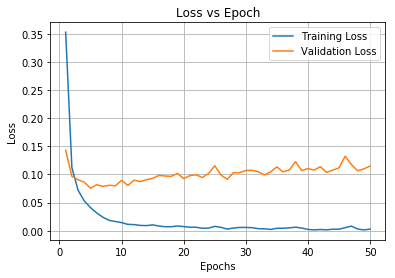

In [8]:
#Plot loss vs epoch
#FILL THIS IN
plt.plot(range(1,51),hist.history['loss'])
plt.plot(range(1,51),hist.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.grid(True)

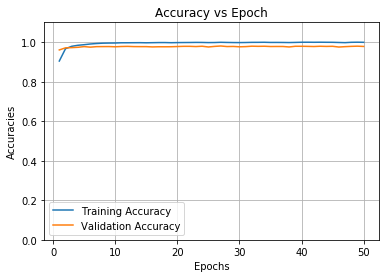

In [9]:
#Plot accuracy vs epoch
#FILL THIS IN
plt.plot(range(1,51),hist.history['acc'])
plt.plot(range(1,51),hist.history['val_acc'])
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylim(0,1.1)
plt.ylabel("Accuracies")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid(True)

In [10]:
#Print accuracy of classifier on MNIST testing data
#FILL THIS IN
backend.set_learning_phase(1)
[test_loss,test_acc] = model.evaluate(data_test, labels_test, batch_size = 256)
print("Test Accuracy: {:0.2f}%".format(test_acc*100))

10000/10000 [==============================] - 0s 34us/step
Test Accuracy: 97.82%


In [16]:
# Edit the classifier name fed into KerasModel Wrapper with the name of the 
# classifier from above and then run this block

#Get TensorFlow Session to pass into Cleverhans modules
sess = backend.get_session()

#Create wrapper for classifier model so that it can be passed into Cleverhans modules
wrap = KerasModelWrapper(model)
backend.set_learning_phase(0)                         

# Part 2: The Fast Gradient Method (FGM)

In [31]:
#Implementing the FGSM attack
backend.set_learning_phase(0)

#FGM Instance on trained classifier from Part 1
#FILL THIS IN
fgm = FastGradientMethod(wrap, sess=sess)

#Attack parameters
#FILL THIS IN
fgm_params = { 'eps': 0.25, 'clip_min': 0.0, 'clip_max': 1.0}

#Generate adversarial data
#FILL THIS IN
fgm_data = fgm.generate_np(data_test, **fgm_params)

#Evaluate accuracy on target classifier 
#FILL THIS IN
# backend.set_learning_phase(0)
[test_loss_fgm, test_acc_fgm] = model.evaluate(fgm_data, labels_test, batch_size = 512)
print("Test Accuracy: {:0.2f}%".format(test_acc_fgm*100))

10000/10000 [==============================] - 0s 28us/step
Test Accuracy: 6.63%


Text(0.5,1,'Adversarial Data')

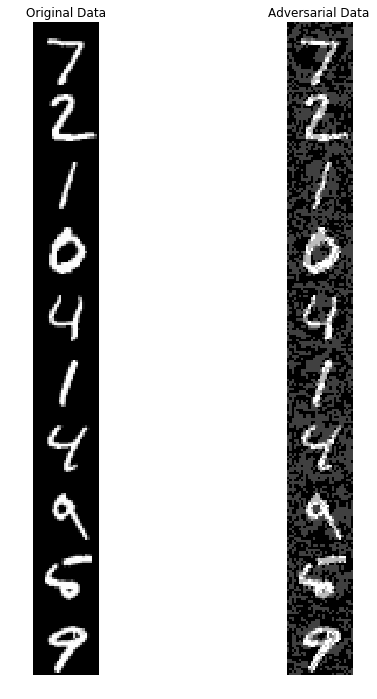

In [32]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN
fig = plt.figure(figsize=(6,12))
fig.subplots_adjust(right=1.2)

# normal
ax = fig.add_subplot(1,2,1)
ax.imshow(data_test[0:10].reshape(-1,28), cmap='gray')
ax.axis('off')
ax.set_title('Original Data')

# adversarial
ax = fig.add_subplot(1,2,2)
ax.imshow(fgm_data[0:10].reshape(-1, 28), cmap='gray')
ax.axis('off')
ax.set_title('Adversarial Data')

In [33]:
#Implementing Detection via Autoencoders

def autoencoder():
    ae = Sequential()
    ae.add(Dense(400, activation=None, kernel_initializer="normal", input_dim=784))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(100, activation=None, kernel_initializer='normal'))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(400, activation=None, kernel_initializer='normal'))
    ae.add(Dense(784, activation='sigmoid', kernel_initializer='normal'))
    return ae

#Create and train the autoencoder using the mean squared error loss and adam optimizer
#FILL THIS IN
fgm_defense = autoencoder()
fgm_defense.compile(loss="categorical_crossentropy", optimizer="adam")
fgm_defense.fit(data_train, data_train, epochs=50, shuffle=True, batch_size=256, verbose=2)

Epoch 1/50
 - 22s - loss: 553.7652
Epoch 2/50
 - 20s - loss: 518.3220
Epoch 3/50
 - 21s - loss: 513.0469
Epoch 4/50
 - 21s - loss: 510.8693
Epoch 5/50
 - 21s - loss: 509.7690
Epoch 6/50
 - 20s - loss: 509.0538
Epoch 7/50
 - 20s - loss: 508.5118
Epoch 8/50
 - 20s - loss: 508.0866
Epoch 9/50
 - 20s - loss: 507.7760
Epoch 10/50
 - 21s - loss: 507.4820
Epoch 11/50
 - 20s - loss: 507.2649
Epoch 12/50
 - 21s - loss: 507.0685
Epoch 13/50
 - 21s - loss: 506.8606
Epoch 14/50
 - 20s - loss: 506.7112
Epoch 15/50
 - 20s - loss: 506.6039
Epoch 16/50
 - 21s - loss: 506.5212
Epoch 17/50
 - 20s - loss: 506.4412
Epoch 18/50
 - 20s - loss: 506.3770
Epoch 19/50
 - 20s - loss: 506.3228
Epoch 20/50
 - 20s - loss: 506.2527
Epoch 21/50
 - 20s - loss: 506.1856
Epoch 22/50
 - 20s - loss: 506.1190
Epoch 23/50
 - 20s - loss: 506.0696
Epoch 24/50
 - 20s - loss: 506.0175
Epoch 25/50
 - 20s - loss: 505.9637
Epoch 26/50
 - 20s - loss: 505.9367
Epoch 27/50
 - 20s - loss: 505.8996
Epoch 28/50
 - 20s - loss: 505.8763
E

In [34]:
#Using the autoencoder for detection and to determine a threshold 

# Create adversarial examples using FGSM on training data
#FILL THIS IN
fgm_data_train = fgm.generate_np(data_train, **fgm_params)

# Obtain reconstruction errors on training set and determine a threshold 
#FILL THIS IN
pred = fgm_defense.predict(fgm_data_train)
error = keras.losses.mean_squared_error(fgm_data_train, pred)

# Convert error tensor into NumPy array 
# CHANGE NAME 'error' TO WHAT YOU CALLED IT ABOVE
error = error.eval(session=sess)

# Determine threshold (based on min in this case) and print it 
#FILL THIS IN
thres = np.min(error)
print("Threshold: {:0.5f}".format(thres))

# Calculate error of adversarial testing set
#FILL THIS IN
pred_test = fgm_defense.predict(fgm_data)
error = keras.losses.mean_squared_error(fgm_data, pred_test)
error = error.eval(session=sess)

# Determine how many examples are above threshold and consider them adversarial
# (true positive count)
# Hint: Use a 'for' loop to compare each error value to the threshold
# Print number of true positive samples
#FILL THIS IN
print("True Positives: {:d}".format(np.size(np.where(error > thres))))

# Determine false positives on benign testing set
#FILL THIS IN 
pred = fgm_defense.predict(data_test)
error = keras.losses.mean_squared_error(data_test, pred)
error = error.eval(session=sess)

# Determine how many examples are above threshold and consider them adversarial
# (false positive count)
# Hint: Use a 'for' loop to compare each error value to the threshold    
# Print number of false positive samples
#FILL THIS IN   
print("False Positives: {:d}".format(np.size(np.where(error > thres))))

Threshold: 0.03144
True Positives: 10000
False Positives: 0


# Part 3: Projected Gradient Descent

In [35]:
#Implementing the PGD attack

#PGD Instance on trained classifier from Part 1
pgd = MadryEtAl(wrap, sess=sess)

#Attack parameters
#FILL THIS IN
pgd_param = {'eps': 0.25, 'eps_iter': 0.01, 'nb_iter': 20, 'clip_min': 0.0, 'clip_max': 1.0}

#Generate adversarial data
#FILL THIS IN
pgd_data_test = pgd.generate_np(data_test, **pgd_param)

#Evaluate accuracy of perturbed data on target classifier
#FILL THIS IN
[test_loss_pgd, test_acc_pgd] = model.evaluate(pgd_data_test, labels_test, batch_size = 512, verbose=2)
print("Test Accuracy: {:0.2f}%".format(test_acc_pgd*100))

Test Accuracy: 0.97%


Text(0.5,1,'Adversarial Data')

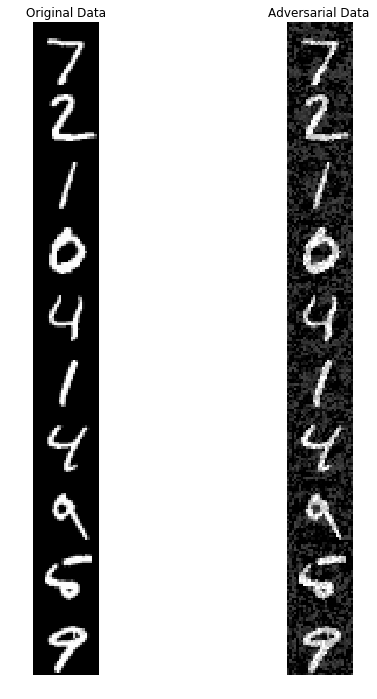

In [36]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN 
fig = plt.figure(figsize=(6,12))
fig.subplots_adjust(right=1.2)

# normal
ax = fig.add_subplot(1,2,1)
ax.imshow(data_test[0:10].reshape(-1,28), cmap='gray')
ax.axis('off')
ax.set_title('Original Data')

# adversarial
ax = fig.add_subplot(1,2,2)
ax.imshow(pgd_data_test[0:10].reshape(-1, 28), cmap='gray')
ax.axis('off')
ax.set_title('Adversarial Data')

In [39]:
#Implementing the adversarial training defense
#FILL THIS IN
adv_trained_clf = model
pgd_data_train = pgd.generate_np(data_train, **pgd_param)

# new dat for training
data_train_pgd = np.concatenate([pgd_data_train,data_train])
labels_train_pgd = np.concatenate([labels_train,labels_train])

hist_pgd = adv_trained_clf.fit(data_train_pgd, labels_train_pgd, validation_data=(pgd_data_test, labels_test),shuffle=True,epochs=50,batch_size=256, verbose=2) 

Train on 120000 samples, validate on 10000 samples
Epoch 1/50
 - 7s - loss: 0.3596 - acc: 0.9463 - val_loss: 0.3988 - val_acc: 0.9311
Epoch 2/50
 - 7s - loss: 0.0282 - acc: 0.9913 - val_loss: 0.3928 - val_acc: 0.9386
Epoch 3/50
 - 7s - loss: 0.0150 - acc: 0.9954 - val_loss: 0.3752 - val_acc: 0.9463
Epoch 4/50
 - 8s - loss: 0.0100 - acc: 0.9971 - val_loss: 0.3700 - val_acc: 0.9455
Epoch 5/50
 - 7s - loss: 0.0073 - acc: 0.9981 - val_loss: 0.3690 - val_acc: 0.9458
Epoch 6/50
 - 7s - loss: 0.0060 - acc: 0.9985 - val_loss: 0.3911 - val_acc: 0.9464
Epoch 7/50
 - 7s - loss: 0.0050 - acc: 0.9985 - val_loss: 0.4027 - val_acc: 0.9465
Epoch 8/50
 - 7s - loss: 0.0048 - acc: 0.9985 - val_loss: 0.4181 - val_acc: 0.9457
Epoch 9/50
 - 7s - loss: 0.0062 - acc: 0.9980 - val_loss: 0.4030 - val_acc: 0.9481
Epoch 10/50
 - 7s - loss: 0.0041 - acc: 0.9988 - val_loss: 0.3747 - val_acc: 0.9526
Epoch 11/50
 - 8s - loss: 0.0039 - acc: 0.9989 - val_loss: 0.3892 - val_acc: 0.9503
Epoch 12/50
 - 8s - loss: 0.0032 -

In [40]:
#Using the defense to evaluate the accuracy of the perturbed data
#FILL THIS IN 
[test_loss_pgd, test_acc_pgd] = model.evaluate(pgd_data_test, labels_test, batch_size = 512, verbose=2)
print("Test Accuracy: {:0.2f}%".format(test_acc_pgd*100))

Test Accuracy: 95.75%


# Part 4: Carlini and Wagner Attack

In [20]:
#Implementing the CW attack

#CW Instance on trained classifier from Part 1
#FILL THIS IN
cw = CarliniWagnerL2(wrap, sess=sess)

#Attack parameters
#FILL THIS IN
cw_param = {'binary_search_steps': 1, 'y': None, 'learning_rate': 1.25, 'batch_size': 16, 
             'initial_const': 10, 'clip_min': 0.0, 'clip_max': 1.0, 'max_iterations': 50}

#Generate adversarial data
#FILL THIS IN
cw_data_test = cw.generate_np(data_test, **cw_param)
print("done generation")

#Evaluate accuracy of perturbed data on target classifier
#FILL THIS IN
[test_loss_cw, test_acc_cw] = model.evaluate(cw_data_test, labels_test, batch_size = 512, verbose=2)
print("Test Accuracy: {:0.2f}%".format(test_acc_cw*100))

done generation
Test Accuracy: 26.50%


Text(0.5,1,'Adversarial Data')

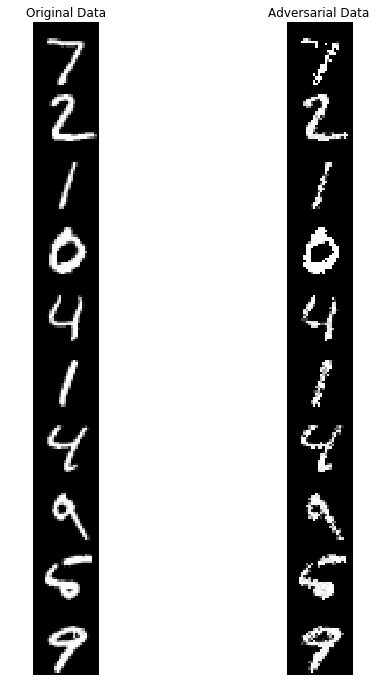

In [21]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN 
fig = plt.figure(figsize=(6,12))
fig.subplots_adjust(right=1.2)

# normal
ax = fig.add_subplot(1,2,1)
ax.imshow(data_test[0:10].reshape(-1,28), cmap='gray')
ax.axis('off')
ax.set_title('Original Data')

# adversarial
ax = fig.add_subplot(1,2,2)
ax.imshow(cw_data_test[0:10].reshape(-1, 28), cmap='gray')
ax.axis('off')
ax.set_title('Adversarial Data')

In [23]:
#Implementing the dimensionality reduction (PCA) defense 

#Calculate PCA projection
pca = PCA(100)
pca.fit(data_train)
pca_train = pca.transform(data_train)
pca_test = pca.transform(data_test)

#Transform perturbed CW data using the subspace from the original training data
#FILL THIS IN 
pca_cw_test = pca.transform(cw_data_test)


# create model for PCA
def pca_model():
    model = Sequential()
    
    #FILL THIS IN 
    model.add(Dense(100, activation='relu', input_dim=100, kernel_initializer="normal"))
    model.add(BatchNormalization())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(BatchNormalization())
    model.add(Dense(10, activation="softmax", kernel_initializer="normal"))
    return model

#Create model graph, compile it, and train it using pca_train lables_train 
#FILL THIS IN 
pca_clas = pca_model()
pca_clas.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer="adam")
hist_pca = pca_clas.fit(pca_train, labels_train, validation_data=(pca_test, labels_test),shuffle=True,epochs=50,batch_size=256, verbose=2) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 2s - loss: 0.5591 - acc: 0.8729 - val_loss: 0.1662 - val_acc: 0.9506
Epoch 2/50
 - 1s - loss: 0.1305 - acc: 0.9613 - val_loss: 0.1109 - val_acc: 0.9677
Epoch 3/50
 - 1s - loss: 0.0884 - acc: 0.9733 - val_loss: 0.0895 - val_acc: 0.9740
Epoch 4/50
 - 1s - loss: 0.0671 - acc: 0.9802 - val_loss: 0.0834 - val_acc: 0.9743
Epoch 5/50
 - 1s - loss: 0.0534 - acc: 0.9843 - val_loss: 0.0742 - val_acc: 0.9776
Epoch 6/50
 - 1s - loss: 0.0433 - acc: 0.9873 - val_loss: 0.0682 - val_acc: 0.9802
Epoch 7/50
 - 1s - loss: 0.0358 - acc: 0.9897 - val_loss: 0.0670 - val_acc: 0.9802
Epoch 8/50
 - 1s - loss: 0.0294 - acc: 0.9920 - val_loss: 0.0659 - val_acc: 0.9804
Epoch 9/50
 - 1s - loss: 0.0241 - acc: 0.9936 - val_loss: 0.0656 - val_acc: 0.9803
Epoch 10/50
 - 1s - loss: 0.0199 - acc: 0.9947 - val_loss: 0.0677 - val_acc: 0.9796
Epoch 11/50
 - 1s - loss: 0.0159 - acc: 0.9963 - val_loss: 0.0664 - val_acc: 0.9812
Epoch 12/50
 - 1s - loss: 0.0130 - 

In [25]:
#Using the defense (and comparing to baseline accuracy)
#FILL THIS IN 
[test_loss_cw, test_acc_cw] = pca_clas.evaluate(pca_cw_test, labels_test, batch_size = 512, verbose=2)
print("Test Accuracy: {:0.2f}%".format(test_acc_cw*100))

Test Accuracy: 80.17%


# Part 5: DeepFool 

In [17]:
#Implementing the DeepFool attack

#DeepFool Instance on trained classifier from Part 1
#FILL THIS IN
df = DeepFool(wrap, sess=sess)

#Attack parameters
#FILL THIS IN
df_params = {'nb_candidate': 10, 'max_iter': 50, 'clip_min': 0.0, 'clip_max': 1.0}

#Generate adversarial data
#FILL THIS IN
df_data_test = df.generate_np(data_test, **df_params)

#Evaluate accuracy of perturbed data on target classifier
#FILL THIS IN
[test_loss_df, test_acc_df] = model.evaluate(df_data_test, labels_test, batch_size = 512, verbose=2)
print("Test Accuracy: {:0.2f}%".format(test_acc_df*100))

Test Accuracy: 1.68%


Text(0.5,1,'Adversarial Data')

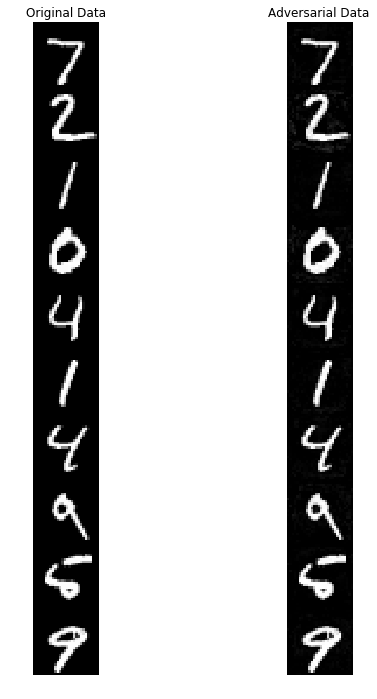

In [18]:
#Show ten original samples and their corresponding adversarial samples
#FILL THIS IN
fig = plt.figure(figsize=(6,12))
fig.subplots_adjust(right=1.2)

# normal
ax = fig.add_subplot(1,2,1)
ax.imshow(data_test[0:10].reshape(-1,28), cmap='gray')
ax.axis('off')
ax.set_title('Original Data')

# adversarial
ax = fig.add_subplot(1,2,2)
ax.imshow(df_data_test[0:10].reshape(-1, 28), cmap='gray')
ax.axis('off')
ax.set_title('Adversarial Data')

In [20]:
#Implementing the Denoising Autoencoder Defense

def autoencoder():
    ae = Sequential()
    ae.add(Dense(400, activation=None, kernel_initializer="normal", input_dim=784))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(100, activation=None, kernel_initializer='normal'))
    ae.add(Dense(200, activation=None, kernel_initializer='normal'))
    ae.add(Dense(400, activation=None, kernel_initializer='normal'))
    ae.add(Dense(784, activation='sigmoid', kernel_initializer='normal'))
    return ae

#Create training data for DAE 
fgm_params = { 'eps': 0.25, 'clip_min': 0.0, 'clip_max': 1.0, 'max_iter': 100}
df_data_train = df.generate_np(data_train, **fgm_params)
print("done generation")
data_total_train = np.concatenate([df_data_train, data_train])
data_total_label = np.concatenate([data_train, data_train])

#Create and train DAE graph
#FILL THIS IN
df_clas = autoencoder()
df_clas.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer="adam")
hist_df = df_clas.fit(data_total_train, data_total_label, shuffle=True,epochs=50,batch_size=256, verbose=2) 

done generation
Epoch 1/50
 - 42s - loss: 536.1573 - acc: 0.0072
Epoch 2/50
 - 40s - loss: 512.2332 - acc: 0.0111
Epoch 3/50
 - 40s - loss: 509.5493 - acc: 0.0116
Epoch 4/50
 - 40s - loss: 508.3186 - acc: 0.0126
Epoch 5/50
 - 40s - loss: 507.5621 - acc: 0.0129
Epoch 6/50
 - 40s - loss: 507.1529 - acc: 0.0125
Epoch 7/50
 - 41s - loss: 506.8514 - acc: 0.0131
Epoch 8/50
 - 40s - loss: 506.6186 - acc: 0.0133
Epoch 9/50
 - 40s - loss: 506.4485 - acc: 0.0136
Epoch 10/50
 - 41s - loss: 506.3101 - acc: 0.0138
Epoch 11/50
 - 40s - loss: 506.1846 - acc: 0.0132
Epoch 12/50
 - 41s - loss: 506.0922 - acc: 0.0132
Epoch 13/50
 - 40s - loss: 506.0059 - acc: 0.0139
Epoch 14/50
 - 40s - loss: 505.9365 - acc: 0.0135
Epoch 15/50
 - 40s - loss: 505.8823 - acc: 0.0134
Epoch 16/50
 - 41s - loss: 505.8277 - acc: 0.0135
Epoch 17/50
 - 40s - loss: 505.7906 - acc: 0.0144
Epoch 18/50
 - 40s - loss: 505.7655 - acc: 0.0139
Epoch 19/50
 - 40s - loss: 505.7382 - acc: 0.0140
Epoch 20/50
 - 40s - loss: 505.6945 - acc: 

In [22]:
#Using the defense

#Use DAE to to remove adversarial perturbation 
#FILL THIS IN
noise_free = df_clas.predict(df_data_test)

#Evaluate accuracy of FGM samples after denoising 
#FILL THIS IN
[test_loss_df, test_acc_df] = model.evaluate(noise_free, labels_test, batch_size = 512, verbose=2)
print("Test Accuracy: {:0.2f}%".format(test_acc_df*100))

Test Accuracy: 97.48%


Text(0.5,1,'After Denoising')

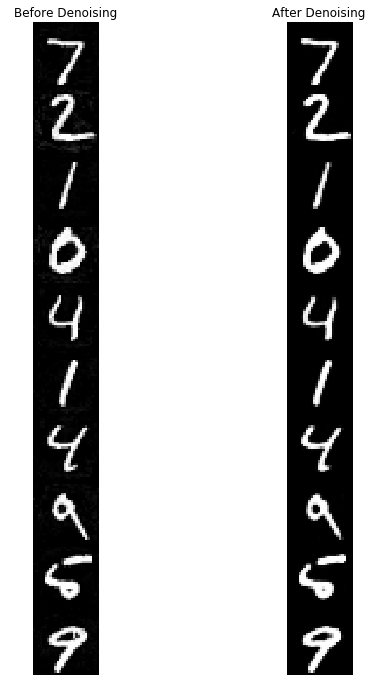

In [23]:
#Show ten samples of adversarial samples after denoising
#FILL THIS IN
fig = plt.figure(figsize=(6,12))
fig.subplots_adjust(right=1.2)

# normal
ax = fig.add_subplot(1,2,1)
ax.imshow(df_data_test[0:10].reshape(-1,28), cmap='gray')
ax.axis('off')
ax.set_title('Before Denoising')

# adversarial
ax = fig.add_subplot(1,2,2)
ax.imshow(noise_free[0:10].reshape(-1, 28), cmap='gray')
ax.axis('off')
ax.set_title('After Denoising')